
#### Data Collection and preprocessing 


In [2]:
import tweepy
import csv
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
nltk.download('vader_lexicon')
from datetime import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/GD/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
#### Twitter API access tokens ( https://apps.twitter.com/ )
consumer_key = 'xxxx'
consumer_secret = 'xxxx'
access_token = 'xxxx'
access_token_secret = 'xxxx'

In [4]:
#### Web scraping with Hashtags
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

# Open/Create a file to append data
csvFile = open('Fifa.csv', 'a')

#Use csv Writer
csvWriter = csv.writer(csvFile)
for tweet in tweepy.Cursor(api.search,q=("#threelions","ItsComingHome","itscominghome","@england"),count=1000,
                           lang="en",
                           since="2015-01-01").items():
    #print (tweet.created_at, tweet.text)
    csvWriter.writerow([tweet.created_at, tweet.text.decode('utf-8')])
col_Names = ["Date","text"]
dataset = pd.read_csv('Fifa.csv',names = col_Names)


In [5]:
## Reading directly through github

wc_df = pd.read_csv("https://raw.githubusercontent.com/solaojp/DATA-620/master/Fifareload.csv", header=None, encoding='utf-8')

In [6]:
wc_df.head()

,0,1,2
0,7/13/18 18:42,b'Any word on who won the Sham Fight this year...,NaN
1,7/13/18 18:42,"b""I'M REALLY SORRY! I WANTED TO KEEP THE TOGET...",NaN
2,7/13/18 18:39,b'RT @16AirAssltBde: #ItsComingHome \nStill to...,NaN
3,7/13/18 18:39,b'RT @kkdhaliwal_: Sikh family wedding. I bloo...,NaN
4,7/13/18 18:39,b'@GaryLineker @sidlowe Can\xe2\x80\x99t wait ...,NaN


In [7]:
sid = SentimentIntensityAnalyzer()

In [8]:
wc_df.columns = ['datetime','tweet','sentiments']

In [9]:
wc_df['sentiment'] = [sid.polarity_scores(tweet)["compound"] for tweet in wc_df['tweet']]

In [10]:
wc_df.head()


,datetime,tweet,sentiments,sentiment
0,7/13/18 18:42,b'Any word on who won the Sham Fight this year...,NaN,0.2732
1,7/13/18 18:42,"b""I'M REALLY SORRY! I WANTED TO KEEP THE TOGET...",NaN,-0.3229
2,7/13/18 18:39,b'RT @16AirAssltBde: #ItsComingHome \nStill to...,NaN,0.0000
3,7/13/18 18:39,b'RT @kkdhaliwal_: Sikh family wedding. I bloo...,NaN,0.3182
4,7/13/18 18:39,b'@GaryLineker @sidlowe Can\xe2\x80\x99t wait ...,NaN,0.0000


In [11]:
del wc_df["sentiments"]

In [12]:
wc_df.head()

,datetime,tweet,sentiment
0,7/13/18 18:42,b'Any word on who won the Sham Fight this year...,0.2732
1,7/13/18 18:42,"b""I'M REALLY SORRY! I WANTED TO KEEP THE TOGET...",-0.3229
2,7/13/18 18:39,b'RT @16AirAssltBde: #ItsComingHome \nStill to...,0.0000
3,7/13/18 18:39,b'RT @kkdhaliwal_: Sikh family wedding. I bloo...,0.3182
4,7/13/18 18:39,b'@GaryLineker @sidlowe Can\xe2\x80\x99t wait ...,0.0000


In [13]:
del wc_df["datetime"]

In [14]:
wc_df.head()

,tweet,sentiment
0,b'Any word on who won the Sham Fight this year...,0.2732
1,"b""I'M REALLY SORRY! I WANTED TO KEEP THE TOGET...",-0.3229
2,b'RT @16AirAssltBde: #ItsComingHome \nStill to...,0.0000
3,b'RT @kkdhaliwal_: Sikh family wedding. I bloo...,0.3182
4,b'@GaryLineker @sidlowe Can\xe2\x80\x99t wait ...,0.0000


#### Text length
As a way of sanity check, let’s look at the length of the string in text column in each entry.


In [ ]:
wc_df['pre_clean_len'] = [len(t) for t in wc_df.tweet]

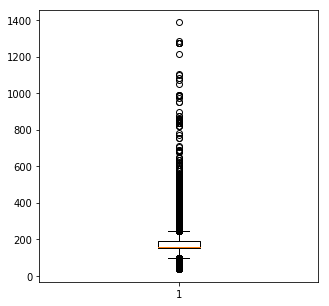

In [16]:
## Box plot
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(wc_df.pre_clean_len)
plt.show()

"This plot gives an interesting insight, since the twitter’s character limit is 140. But from the above box plot, some of the tweets are more than 140 characters long."

In [17]:
wc_df[wc_df.pre_clean_len > 140].head(10)

,tweet,sentiment,pre_clean_len
1,"b""I'M REALLY SORRY! I WANTED TO KEEP THE TOGET...",-0.3229,141
2,b'RT @16AirAssltBde: #ItsComingHome \nStill to...,0.0000,155
4,b'@GaryLineker @sidlowe Can\xe2\x80\x99t wait ...,0.0000,163
5,"b""RT @aufwiedpet: Barry Taylor demonstrates hi...",0.0000,154
6,"b'RT @UnitedOddsocks: Treat Tuesdays! FOLLOW, ...",0.9065,176
7,b'RT @superpidge: Just heard my neighbour sing...,0.5106,175
8,b'RT @livuniTechDirec: So proud to collect the...,0.8687,154
10,b'RT @littlejetco: Two departures this morning...,0.1511,154
15,"b'RT @RunningWomanUK: Use promo code ""itscomin...",0.0000,155
16,b'RT @ledu_tokens: We\xe2\x80\x99re finalizing...,0.0000,165


In [18]:
## Data Preaparation: Point we need to take care of while scrapping through twitter data
1 HTML Encoding
2 @mentions
3 URL Links
4 UTF-8 encoding 

In [21]:

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(tweet):
    soup = BeautifulSoup(tweet, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(b"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [22]:
import numpy as np
nums = [0,18042]
print("Cleaning and parsing the tweet...\n")
clean_tweet_texts = []
for i in range(nums[0],nums[1]):
    if( (i+1)%1000 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, nums[1] ))                                                                    
    clean_tweet_texts.append(tweet_cleaner(wc_df['tweet'][i]))

Cleaning and parsing the tweet...

Tweets 1000 of 18042 has been processed
Tweets 2000 of 18042 has been processed
Tweets 3000 of 18042 has been processed
Tweets 4000 of 18042 has been processed
Tweets 5000 of 18042 has been processed
Tweets 6000 of 18042 has been processed
Tweets 7000 of 18042 has been processed
Tweets 8000 of 18042 has been processed
Tweets 9000 of 18042 has been processed
Tweets 10000 of 18042 has been processed
Tweets 11000 of 18042 has been processed
Tweets 12000 of 18042 has been processed
Tweets 13000 of 18042 has been processed
Tweets 14000 of 18042 has been processed
Tweets 15000 of 18042 has been processed
Tweets 16000 of 18042 has been processed
Tweets 17000 of 18042 has been processed
Tweets 18000 of 18042 has been processed


In [23]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['tweet'])
clean_df['sentiment'] = wc_df.sentiment
clean_df.head()

,tweet,sentiment
0,any word on who won the sham fight this year i...,0.2732
1,really sorry wanted to keep the togetherness o...,-0.3229
2,rt itscominghome nstill to be fully reassemble...,0.0000
3,rt sikh family wedding bloody love this countr...,0.3182
4,can xe wait to be at hyde park again and lob l...,0.0000


In [32]:
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,tweet,sentiment
0,any word on who won the sham fight this year i...,0.2732
1,really sorry wanted to keep the togetherness o...,-0.3229
2,rt itscominghome nstill to be fully reassemble...,0.0000
3,rt sikh family wedding bloody love this countr...,0.3182
4,can xe wait to be at hyde park again and lob l...,0.0000


In [33]:
# Checking clean dataframe
my_df.info()
my_df['sentiment'].describe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18042 entries, 0 to 18041
Data columns (total 2 columns):
tweet        18042 non-null object
sentiment    18042 non-null float64
dtypes: float64(1), object(1)
memory usage: 422.9+ KB


<bound method NDFrame.describe of 0        0.2732
1       -0.3229
2        0.0000
3        0.3182
4        0.0000
5        0.0000
6        0.9065
7        0.5106
8        0.8687
9        0.1531
10       0.1511
11       0.8176
12       0.0000
13       0.6800
14       0.1531
15       0.0000
16       0.0000
17       0.0000
18       0.0000
19      -0.4753
20       0.1531
21       0.0000
22       0.8070
23       0.0000
24       0.5719
25       0.7096
26       0.0000
27       0.0000
28       0.0000
29       0.0000
          ...  
18012    0.5093
18013    0.5574
18014    0.0000
18015    0.5093
18016    0.6249
18017    0.0000
18018    0.6884
18019    0.7777
18020    0.7777
18021    0.8496
18022    0.0000
18023    0.5267
18024    0.3400
18025    0.2481
18026    0.7003
18027   -0.2732
18028    0.6908
18029    0.0000
18030    0.5093
18031    0.0000
18032   -0.5267
18033    0.0000
18034    0.7783
18035    0.0000
18036    0.7840
18037    0.4101
18038    0.6369
18039    0.3612
18040    0.1007
18041 

In [26]:
## Dataframe shows no null entries.we can proceed further

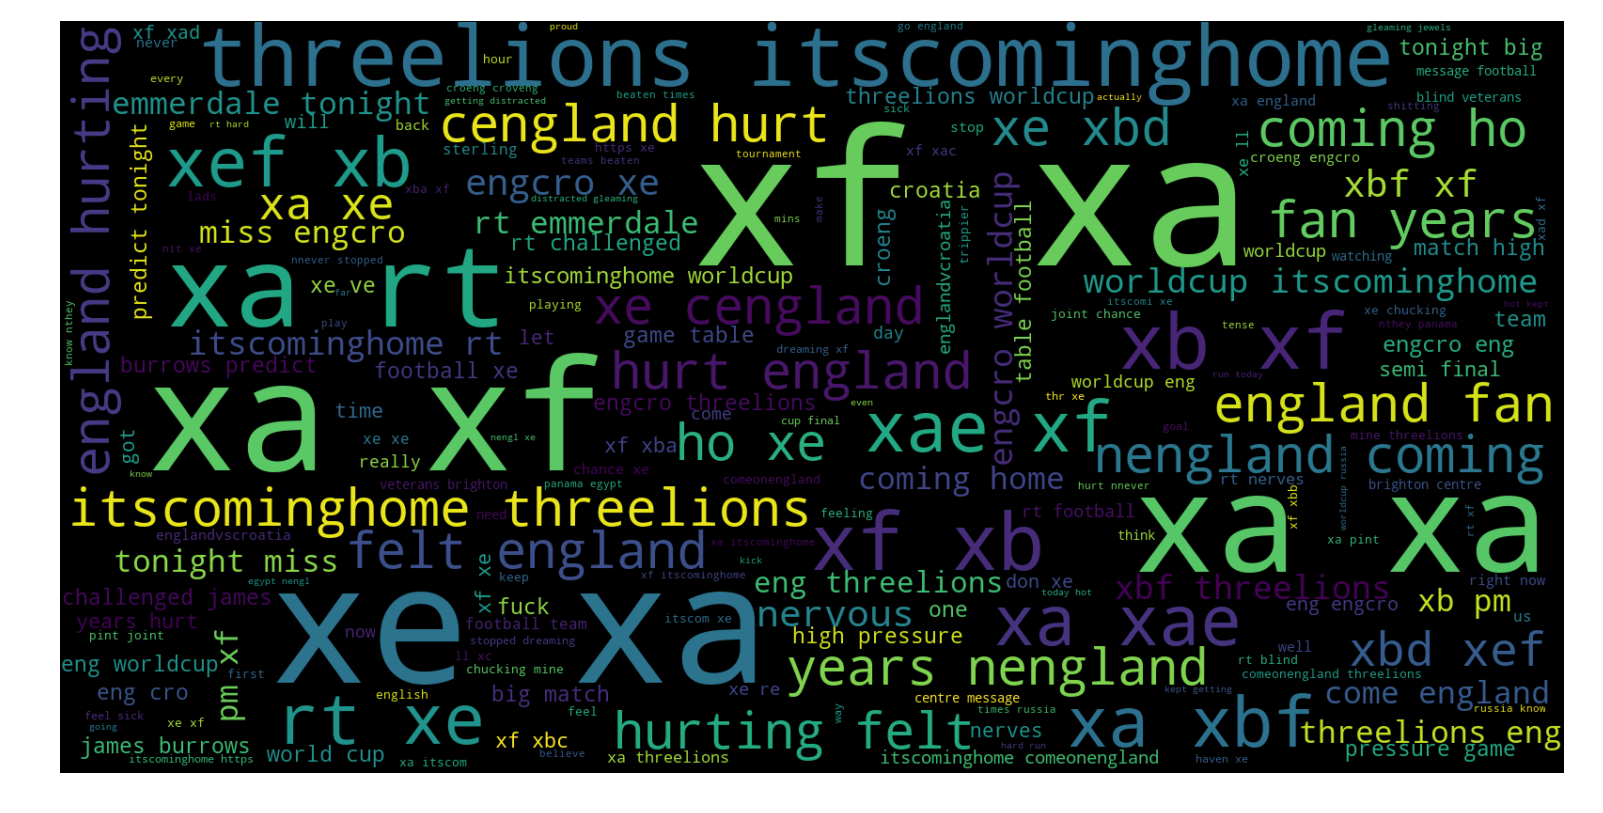

In [34]:
##  Negative tweets cloud
neg_tweets = my_df[(my_df.sentiment < 0)]
neg_string = []
for t in neg_tweets.tweet:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

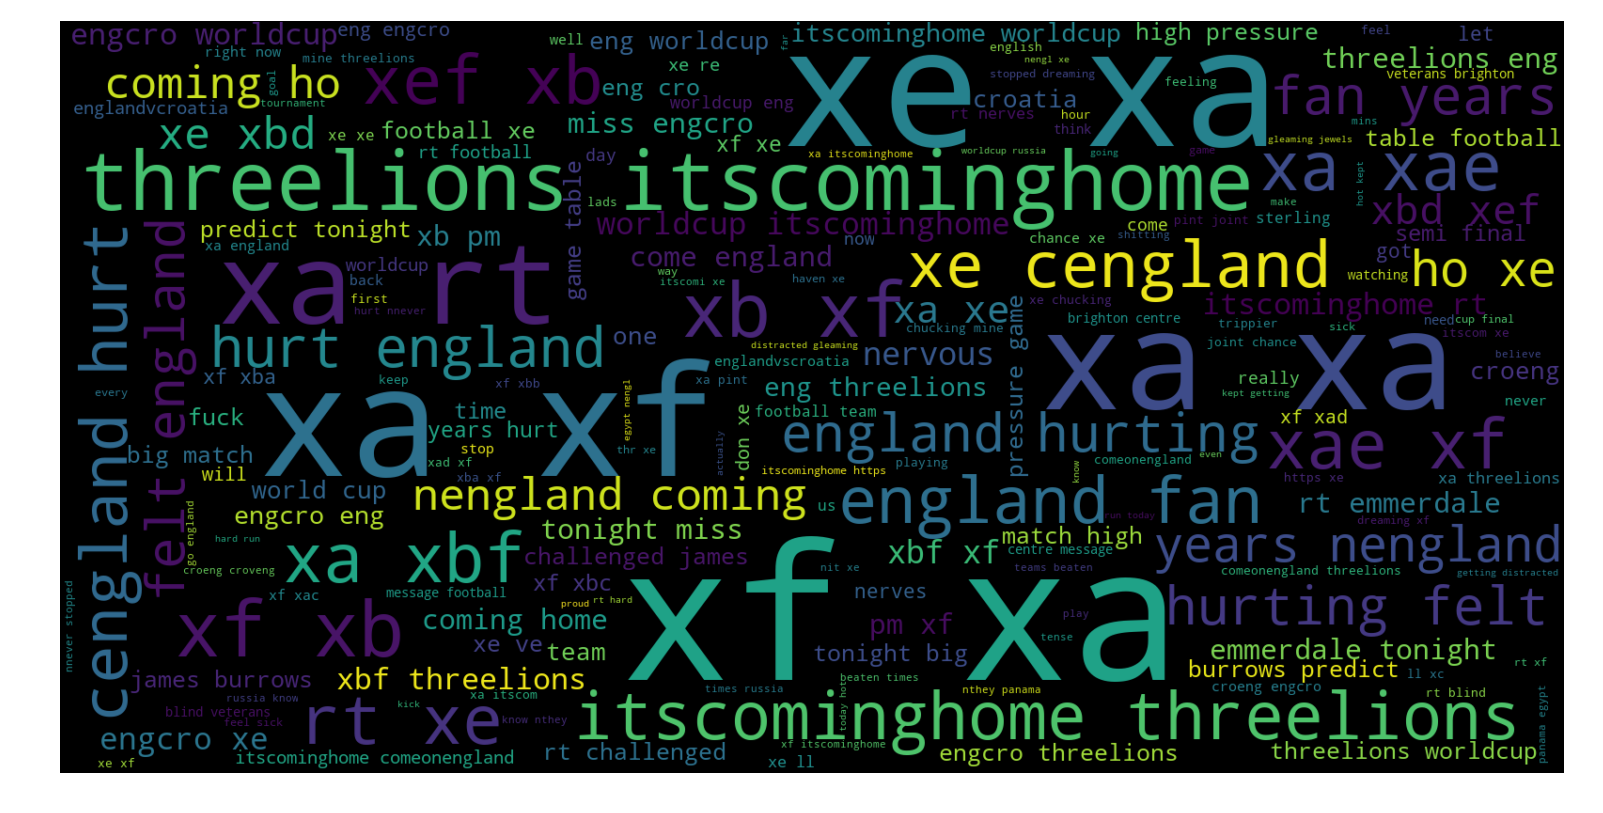

In [35]:
#### Positive tweets
pos_tweets = my_df[(my_df.sentiment > 0.5)]
pos_string = []
for t in pos_tweets.tweet:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()